In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
pd.options.display.float_format = '{:,}'.format

In [63]:
DIR = './'
DIR_GENRE = './genre/'

In [3]:
def count_reviews(file_name):
    print('counting file:', file_name)
    n_review = 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, len(book_set), len(user_set)



In [64]:
file_name = os.path.join(DIR, 'goodreads_reviews_dedup.json.gz')

In [65]:
def parse_fields(line):
    data = json.loads (line)
    return {
      "book_id": data["book_id"],
      "user_id": data["user_id"],
      "rating": data["rating"],
      "review": data["review_text"],
        "votes" : data["n_votes"]
  }


In [66]:
book_reviews = [] 

with gzip.open(file_name) as f:
    while True:
        line = f.readline()
        if not line:
            break
        print(line)
        break
#         fields = parse_fields(line)

#         try:
#             VOTES = int(fields["votes"])
#         except ValueError:
#             continue
#         if VOTES > 15:
#             book_reviews.append(fields)


b'{"user_id": "8842281e1d1347389f2ab93d60773d4d", "book_id": "24375664", "review_id": "5cd416f3efc3f944fce4ce2db2290d5e", "rating": 5, "review_text": "Mind blowingly cool. Best science fiction I\'ve read in some time. I just loved all the descriptions of the society of the future - how they lived in trees, the notion of owning property or even getting married was gone. How every surface was a screen. \\n The undulations of how society responds to the Trisolaran threat seem surprising to me. Maybe its more the Chinese perspective, but I wouldn\'t have thought the ETO would exist in book 1, and I wouldn\'t have thought people would get so over-confident in our primitive fleet\'s chances given you have to think that with superior science they would have weapons - and defenses - that would just be as rifles to arrows once were. \\n But the moment when Luo Ji won as a wallfacer was just too cool. I may have actually done a fist pump. Though by the way, if the Dark Forest theory is right - a

In [1]:
import pandas as pd


r_pd = pd.DataFrame.from_dict(book_reviews)

NameError: name 'book_reviews' is not defined

In [31]:
r_pd.head()

,book_id,user_id,rating,review,votes
0,24375664,8842281e1d1347389f2ab93d60773d4d,5,Mind blowingly cool. Best science fiction I've...,16
1,18245960,8842281e1d1347389f2ab93d60773d4d,5,This is a special book. It started slow for ab...,28
2,22078596,8842281e1d1347389f2ab93d60773d4d,4,"Fun, fast paced, and disturbing tale of murder...",22
3,29983426,8842281e1d1347389f2ab93d60773d4d,5,I decided to give up eating processed sugar fo...,26
4,29893493,8842281e1d1347389f2ab93d60773d4d,5,I haven't read a non-fiction book this engagin...,29


In [32]:
r_pd["rating"] = pd.to_numeric(r_pd["rating"])

r_pd["votes"] = pd.to_numeric(r_pd["votes"])

In [34]:
r_pd["review"] = r_pd["review"].str.replace("[^a-zA-Z0-9 ]", "", regex = True)

In [35]:
r_pd["review"] = r_pd["review"].str.lower()# Convert title to lower case

In [36]:
r_pd["review"] = r_pd["review"].str.replace("\s+", " ", regex=True) 

In [38]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [39]:
r_pd['polarity'] = r_pd['review'].apply(pol)
r_pd['subjectivity'] = r_pd['review'].apply(sub)

In [40]:
r_pd.to_csv('sentimentdata.txt', encoding='utf-8', index=False, sep=',')

In [41]:
r_pd.head(10)

,book_id,user_id,rating,review,votes,polarity,subjectivity
0,24375664,8842281e1d1347389f2ab93d60773d4d,5,mind blowingly cool best science fiction ive r...,16,0.34897959183673466,0.42219387755102045
1,18245960,8842281e1d1347389f2ab93d60773d4d,5,this is a special book it started slow for abo...,28,0.17622180451127817,0.43020050125313286
2,22078596,8842281e1d1347389f2ab93d60773d4d,4,fun fast paced and disturbing tale of murder g...,22,0.14466666666666664,0.5696190476190476
3,29983426,8842281e1d1347389f2ab93d60773d4d,5,i decided to give up eating processed sugar fo...,26,0.0851346801346801,0.4758922558922559
4,29893493,8842281e1d1347389f2ab93d60773d4d,5,i havent read a nonfiction book this engaging ...,29,0.20837848932676517,0.4698604269293924
5,8191070,8842281e1d1347389f2ab93d60773d4d,5,best book of the series and best book about am...,25,0.1930555555555556,0.44900793650793636
6,28684704,8842281e1d1347389f2ab93d60773d4d,3,a fun fast paced science fiction thriller i re...,22,0.18290231864095496,0.5905813000131181
7,32768285,8842281e1d1347389f2ab93d60773d4d,5,a fun humorous fastpaced and fascinating take ...,16,0.19243283582089557,0.5610124378109453
8,28119237,8842281e1d1347389f2ab93d60773d4d,4,a fascinating book about community and belongi...,30,0.135,0.4216137566137566
9,30282601,8842281e1d1347389f2ab93d60773d4d,4,my first scalzi book and really enjoyed it del...,18,0.23412698412698413,0.4944444444444444


In [43]:
r_pd.loc[r_pd['polarity'].idxmax()]

book_id                                                  34368544
user_id                          720a4945e12bbc11051589b7eb1facde
rating                                                          5
review          omg guys this is probably the best book in the...
votes                                                          48
polarity                                                      1.0
subjectivity                                                  0.3
Name: 158, dtype: object

In [2]:
import pandas as pd

df = pd.read_csv('sentimentdata.txt')

In [25]:
len(df)

193598

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
gle = LabelEncoder()
user_id_labels = gle.fit_transform(df['user_id'])

In [5]:
df['user_id'] = user_id_labels
df.head()

,book_id,user_id,rating,review,votes,polarity,subjectivity
0,24375664,8545,5,mind blowingly cool best science fiction ive r...,16,0.3489795918367346,0.4221938775510204
1,18245960,8545,5,this is a special book it started slow for abo...,28,0.1762218045112781,0.4302005012531328
2,22078596,8545,4,fun fast paced and disturbing tale of murder g...,22,0.1446666666666666,0.5696190476190476
3,29983426,8545,5,i decided to give up eating processed sugar fo...,26,0.0851346801346801,0.4758922558922559
4,29893493,8545,5,i havent read a nonfiction book this engaging ...,29,0.2083784893267651,0.4698604269293924


<AxesSubplot:ylabel='Frequency'>

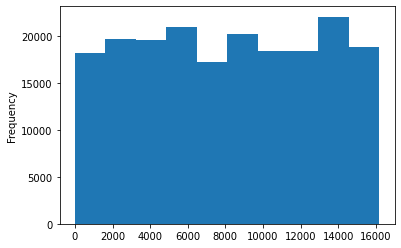

In [7]:
df['user_id'].plot.hist()

We have decided to convert polarity into a rating value, using the following equation
\begin{equation*}
       Y = \frac{X}{X_{range}}N
    \end{equation*}

In [6]:
df['polarity_rating'] =  np.nan

for row in range(len(df['polarity'])):
    if (df['polarity'][row]) < 0:
        r_val = 5 * abs(df['polarity'][row])/2
    else:
        r_val = 5 * abs(df['polarity'][row] + 1) / 2
        
    df['polarity_rating'][row] = r_val
        

/tmp/ipykernel_294198/1467619860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_rating'][row] = r_val


In [7]:
import math  

now we will calculate a weighted average, we consider polarity rating to be 70% and rating to be 30%

In [8]:
df["final_polarity"] = np.nan

In [9]:
value = df['rating'][1] * (.5)  + df['polarity_rating'][1] * (.5)
if value % int(value) >= 0.5:
    print(math.floor(value))

3


In [ ]:
for row in range(len(df['rating'])):
    value = df['rating'][row] * (.5)  + df['polarity_rating'][row] * (.5)
    if value % int(value) >= 0.5:
        df["final_polarity"][row] = math.ceil(value)
    else:
        df["final_polarity"][row] = math.floor(value)
         

/tmp/ipykernel_294198/825458507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["final_polarity"][row] = math.floor(value)
/tmp/ipykernel_294198/825458507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["final_polarity"][row] = math.ceil(value)
/tmp/ipykernel_294198/825458507.py:3: RuntimeWarning: invalid value encountered in double_scalars
  if value % int(value) >= 0.5:


In [ ]:
df["final_polarity"]

In [ ]:
df["final_rating"] = df["final_polarity"]

In [ ]:
df.head(10)

In [ ]:
df["final_rating"] = df["final_rating"].astype(int)

In [ ]:
df["rating"] = df["final_rating"]

In [35]:
df.to_csv('sentimentdata_final.txt', encoding='utf-8', index=False, sep=',')

The final rating was converted to rating in and stored in sentiment_data_final_final, the code got removed, as much doing multiple things, but its an a simple process, I have created replaced the rating column with final_rating

In [4]:
df = pd.read_csv('sentiment_data_final_final.csv')

In [6]:
df = df[['user_id', 'book_id', 'rating']]

In [7]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [10]:
from surprise.prediction_algorithms.algo_base import AlgoBase
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.slope_one import SlopeOne
from surprise.prediction_algorithms.co_clustering import CoClustering
from surprise.model_selection import cross_validate

The following are the algorithms, we have chosen, SVD, KNN, KNN with means and co clustering. As you can see 3 of them are based on classification and the other (co clustering) is based upon clustering. Along with that we have done cross valiation with 3, as we have acheived good results, we have decided not to further dig in to the algorithms and the parameters. However, in future we can and due to time constraints, this is where we draw.

In [8]:
algos = {'svd' : SVD(verbose=True, n_epochs=10), 'knn': KNNBasic(), 'knn_with_means': KNNWithMeans(), 'co_clustering': CoClustering()}

In [9]:
for key, algo in algos.items():
    print("for the algorithm", key)
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

for the algorithm svd
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8242  0.8309  0.8206  0.8253  0.0043  
MAE (testset)     0.5600  0.5628  0.5585  0.5605  0.0018  
Fit time          4.35    4.10    4.20    4.22    0.10    
Test time         0.53    0.53    0.44    0.50    0.04    
for the algorithm knn
Computing the msd similarity matrix..

From the results we can clearly see SVD has the best results, moreover, in terms of Mean Absolute Error, SVD does better. Overall SVD is a better model, considering RMSE is has more value in evaluation metrics as it accounts the positive and the negative values, along with that it squares root it, it is a better metric for Evaluation. 

In [8]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [11]:
svd = SVD(verbose=True, n_epochs=10)

In [12]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8272  0.8267  0.8223  0.8254  0.0022  
MAE (testset)     0.5618  0.5605  0.5593  0.5606  0.0010  
Fit time          3.70    3.90    3.94    3.85    0.10    
Test time         0.34    0.48    0.47    0.43    0.06    


{'test_rmse': array([0.82718503, 0.82665512, 0.82227173]),
 'test_mae': array([0.56182252, 0.56050735, 0.55933301]),
 'fit_time': (3.7043724060058594, 3.897462844848633, 3.9395480155944824),
 'test_time': (0.3438990116119385, 0.4848504066467285, 0.47122693061828613)}

In [10]:
trainset = data.build_full_trainset()

In [11]:
testset = trainset.build_testset()

In [12]:
testset

[(8545, 24375664, 4.0),
 (8545, 18245960, 4.0),
 (8545, 22078596, 3.0),
 (8545, 29983426, 3.0),
 (8545, 29893493, 4.0),
 (8545, 8191070, 4.0),
 (8545, 28684704, 3.0),
 (8545, 32768285, 4.0),
 (8545, 28119237, 3.0),
 (8545, 30282601, 3.0),
 (8545, 20873740, 4.0),
 (8545, 19398490, 3.0),
 (8545, 18662473, 4.0),
 (8545, 10405048, 3.0),
 (8545, 22875447, 4.0),
 (8545, 23158207, 3.0),
 (8545, 22318578, 4.0),
 (8545, 22551730, 3.0),
 (8545, 22816087, 4.0),
 (8545, 18176747, 4.0),
 (8545, 21792828, 4.0),
 (8545, 19816540, 4.0),
 (8545, 12961964, 3.0),
 (8545, 8125726, 4.0),
 (8545, 17315048, 4.0),
 (8545, 19404862, 3.0),
 (8545, 18659415, 3.0),
 (8545, 17451257, 4.0),
 (8545, 13526165, 3.0),
 (8545, 8622058, 4.0),
 (8545, 5572634, 4.0),
 (8545, 8664353, 4.0),
 (8545, 11297044, 4.0),
 (8545, 6563914, 4.0),
 (8545, 211099, 4.0),
 (8545, 8694005, 3.0),
 (8545, 8213519, 2.0),
 (8545, 7518289, 4.0),
 (8545, 6828896, 4.0),
 (8545, 2767052, 3.0),
 (8545, 76620, 4.0),
 (8545, 368593, 4.0),
 (8545, 10

In [14]:
predictions = svd.test(testset)

In [16]:
top_n = get_top_n(predictions, n=10)

In [17]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

8545 [32768285, 8664353, 8622058, 17315048, 368593, 350, 5544, 21792828, 21, 18176747]
107 [28435457, 27428320, 27335087, 27252717, 36065344, 30329506, 36252773, 32468167, 34853896, 30826144]
934 [1840511]
13323 [28214365, 27070074, 7445, 27208825, 22550581, 25150798, 25899336, 26367014, 26193026, 25781157]
8929 [18705209, 12127810, 10662420]
7113 [34368544, 35789068]
7979 [16082357]
3389 [29640839]
14942 [16169865]
4402 [25106953]
5797 [8591107, 12049227, 6931356, 10507293]
3250 [22294935]
8602 [19015729, 21863320, 17208007, 23844390, 26762222, 24504274, 21400356]
13828 [5211]
661 [32065242]
248 [819789]
8857 [19063, 15931, 824058]
2224 [16170663]
14216 [25365530]
5106 [15753060]
12747 [23398629]
2057 [8584913]
11326 [74812]
7572 [17404078, 15776309, 19523454]
12932 [331260]
13935 [13448037]
6550 [22910142]
4634 [32798151]
6278 [288222, 2898939]
582 [10569, 18007564, 576885, 821893, 355697, 3637, 17851885, 43369, 16981, 23665558]
4592 [105703]
5697 [17607541, 1007048, 5303881, 1938364

15966 [355095]
13325 [30840370]
13515 [20443235, 20820994, 17399160, 18798983, 7171637, 10798416, 27307561, 6604794, 23308084, 13519397]
22 [17733722, 16149099, 16039284, 10844716, 6612719, 9378347, 19391511, 10445095, 17373362, 11489526]
10309 [11366397]
14556 [292740]
14857 [7613, 3614388, 5996844, 6614886, 6254669, 2244796, 3827274, 6017363, 2750008]
4857 [5128]
11625 [5297]
7738 [20504754, 33156573, 26069114, 5167, 22642465, 32141271, 27071481, 31817749, 31749100, 26236876]
7176 [29939230, 25372801, 93269, 25816688, 25543181, 19288321, 18302455, 18693684, 27883214, 6081548]
15812 [13636721, 7501493, 13629778, 8459711, 7137339, 13349409]
11562 [578519]
13495 [9303]
14378 [17727276, 77585]
5830 [17378527]
3305 [27840861, 15745753, 25548744]
5707 [2548866]
14928 [17698452, 17405912, 21406484, 25060227]
3646 [16115612, 22839894, 22041082, 7489370, 32799280]
6282 [17333223]
7005 [9361589, 20707959, 24040551]
3071 [31307650]
8737 [6665671, 6596547]
3020 [24473763, 25128811, 16248319, 598

15317 [6684320]
11931 [16281293, 16039284, 17347634, 8810753, 27859746, 15836355, 31947246, 15749417, 32978322, 8205860]
1797 [20764879, 23131087, 25526296, 13699726, 20706718, 15842637, 24040562, 17331828, 25740412]
9513 [20613470, 18667779]
5832 [9601072]
3230 [23437156, 18401393, 10194157, 8621462, 22299763, 14061957, 31938963, 5496383, 13537029, 6122468]
7641 [18243700, 20560137, 20613470, 14290364, 18006496, 22328567, 20829994, 20814989, 22510983, 22294935]
10777 [16096824, 24823232, 18798983, 24931971, 25273071, 23877720]
690 [21936809, 12649718, 25574782, 19486412, 17333319, 32735394, 26109394]
2871 [17162]
15892 [13206900, 23437156, 13206760, 34605974]
15540 [12012]
9441 [32978021]
3013 [80660]
5091 [775291]
12167 [34568988, 30352348, 29370481]
3907 [18655937]
1673 [935308]
13970 [17901330]
9015 [31848296, 13530973, 25733983, 9858488, 18693763, 28114411, 12095063, 11550559, 32572166]
10237 [25489064]
9556 [2475251]
4531 [9378733, 6953508]
5642 [3086160]
11366 [682761]
4180 [866

9353 [25564665, 24920901, 22535694, 22848621]
14596 [33602101]
15788 [8490112, 28587653, 5628753, 29079619, 6582637, 27422533, 30982029, 31867358, 29541068, 304027]
4574 [9235960]
3600 [21933947]
9937 [408615]
11003 [12000020]
8582 [27252717, 22609310, 31560190, 30325011, 23662114, 28587653, 33637540, 33408530, 27856826, 31520171]
3730 [26059449, 30045811, 22875103]
14431 [11469379]
2111 [3, 12000020, 6, 23453112, 18774964, 2153405, 17287009, 808017, 19063, 16181775]
4442 [59721]
11608 [29395120]
10471 [17347389, 77523, 28006120, 12127810, 18481271, 30312891]
70 [888888]
7487 [18214414, 20819682]
4318 [26215628]
10314 [14201, 9361589, 72193, 18749172, 17571007, 18490637, 7057991, 11486, 51799, 977]
13582 [13206828, 11408650]
675 [32711569, 25989412]
7537 [18215609, 18168902, 13484184, 20425512]
8518 [23834082]
7756 [2731276, 1779929, 783291, 2336101]
587 [18275832]
1489 [83732, 16109202, 25105382, 151280, 663477, 25111728, 2865, 416775, 3409590]
9114 [18079776]
13056 [30079275]
628 [11

13483 [17406532, 23005688]
14548 [35186206, 16090981, 24378015, 18246727]
14784 [27808036]
8726 [24859990]
13604 [18594642]
2620 [2657, 26109391, 23398919, 27189194, 27070074, 18007564, 18812405, 30333188, 25667069, 27833673]
5228 [13206760, 16096824, 11235712]
11998 [16096824, 561456, 20821111, 16131534]
3391 [18039177]
80 [10576365]
5930 [30192308, 30763174]
7747 [28214365, 32995545, 34816838, 30152610, 32080126]
11103 [16133830, 455592, 10614, 30183904, 6483211, 30088893]
228 [18757526]
15490 [20211556]
8879 [16096824, 6148028]
12889 [13925]
9946 [22429350, 11983940, 13372690, 22066068, 22609310, 18798983, 12968705, 13188676, 20698530, 17234658]
1738 [27840861, 26073150, 2999475]
12004 [22315280]
1015 [26873626, 11112731]
16023 [37470, 38533, 6574390, 4703905, 7285498, 13031380, 8913852]
5587 [31938356]
10245 [3249855, 11124227, 10762859, 9774489, 10491921]
4446 [21857294]
12901 [77203]
2822 [11235712, 16096824, 17927395, 29243709, 657034, 9783200, 11422, 17167166, 26114135, 2361403

8007 [32451777]
1229 [17699859]
15331 [3475268, 1225621]
9712 [7826117, 7332493]
7656 [27362503]
8182 [1772674, 6184317, 781787]
9578 [6719736, 7655564]
12011 [19547856, 19351043, 13188676, 12000020, 18189606, 30312557, 8490112, 27833670, 23395680, 10694831]
5809 [16073046]
11673 [34883125]
12379 [9723667, 23398961, 30509033, 21104828, 27408567, 27274370, 33607640, 33098837, 32336170, 30893014]
3253 [15985372, 6782412, 12383252, 2403922]
11925 [24823347]
8188 [13402447]
8662 [38463, 730745, 743819]
10589 [2657, 33232571, 28181315, 5297, 10541690, 3281941]
10053 [15720033, 20510215, 32180061, 18589730, 9694377, 9720556, 17265054, 17228544, 15724561, 33800989]
68 [18387597, 3503947, 8239301]
3909 [22551730]
14023 [18404143]
8032 [23437156, 33643994, 23395680, 23766634, 16096824, 22841994, 29749085, 32602219, 11235712, 32571395]
5527 [29559052]
12670 [3996887]
5159 [30373401, 16100972, 33640496, 36042389, 29496675, 17259690, 35615310, 33385229, 31082300, 26236898]
11798 [16044985]
7642 [2

1963 [10776592]
13850 [6940844]
9990 [12649718, 17927395, 13206828, 13206760, 11235712, 18249281, 32861092, 29559052, 16101128, 24909485]
9261 [28364022]
7390 [13575267]
3693 [33584818, 30821598, 12033455, 29920081, 50379, 6746018, 686716, 25914145, 20663088, 31393997]
10214 [29569157]
1490 [11418574]
6948 [8131305, 8542840]
15831 [34202199, 34273346, 34315289]
1709 [11870085]
11940 [22535480, 11531546, 297673, 12143200, 6426026, 11107244, 10460458, 34121119, 2834255, 5967064]
13479 [23437156]
10924 [2392677, 3153116, 23353034, 24981611, 25635774, 18879551, 22602419]
914 [34098873, 26126040]
14333 [13034919]
2178 [35504431, 30653853, 25909375, 25322449, 20521670, 25437747, 25022128, 32601841, 23266378, 24550848]
3340 [735922]
11791 [30089321]
2140 [34376393, 32766432, 30316819, 27249428, 29930562]
6188 [22299763, 22448211, 9657611, 25605400, 6522689, 21801144, 32938039, 23435302, 10763598, 28550026]
15074 [49436, 529579]
4600 [15842705]
7241 [13128]
5342 [24974996]
14499 [281235, 13485

12823 [65110]
7146 [33916909]
4724 [16096824]
12902 [18166143, 16113791, 18045813]
8309 [12649718]
6313 [16176440, 12872236, 18143977, 12968662, 17283744, 18295858]
12049 [13638125, 17675462, 18798983, 17927395, 22892448, 13115995, 28962906, 27190613, 35396180, 13579626]
8995 [5868421]
2704 [17927395]
6528 [34661915, 1129287, 17346068, 34227949, 18720858]
15047 [6374933, 25074456, 7276524, 3214846, 1389812, 910668, 695339, 503594, 3110100, 519088]
13892 [17860739]
9277 [18869177]
3348 [13126099]
4772 [13101761]
14881 [12305459, 10576]
1234 [25868031]
11753 [15750477, 16107277, 16006, 18601180, 17379259, 774060, 15830843, 2241948, 16153448, 16161300]
12000 [13542640]
11610 [12805465]
1745 [29544996]
5254 [10372351]
4199 [6570431]
6695 [27833670, 22733729, 25953369, 29983711, 23995336, 28251002, 25855506, 27746288, 29780253, 30688435]
9713 [24375704]
8487 [186074]
14036 [25707621]
2521 [12367058]
3183 [656, 17245, 8686068, 17717, 76171, 6219656, 24972, 25490, 4929]
14804 [34848761]
978 [

6061 [28805786, 33898320, 24017512]
629 [9712341]
5723 [77247]
12697 [3018318]
389 [31804840, 35388495, 35497182, 30319982, 7238426, 35430252, 35227574, 32854296, 30963793, 16745864]
14900 [13499078]
351 [19063, 9361589, 22628, 31578741, 5297, 5355, 32682136, 10917, 15839984, 22557272]
10497 [7875327]
10354 [13152, 8752457, 1162543]
16052 [12084278, 12924326, 13423346, 11115434, 11870085, 12680998, 10345927, 13360957]
7258 [33016249]
16143 [16044296]
16087 [114192, 2455819]
4237 [13637412, 16076787, 6614886]
4106 [18634501]
12482 [2339764]
12865 [16128105]
303 [6708, 320582, 21944886, 14743]
10701 [822993]
11611 [8793166, 22909015, 8679275, 17449460, 3554772, 6082944, 2364284, 7146277, 12040523, 17524166]
14186 [18773627]
1060 [29281476]
9469 [8949023]
74 [27415371]
160 [301304]
15654 [33014780]
15898 [6279500]
15965 [17347389]
7156 [13401993]
3495 [168484]
11602 [12444297]
8859 [73184]
6984 [18467794]
9932 [16173484, 13451045, 13244578]
7698 [11148223, 23735067, 20257154, 678362]
7092

36 [15801353, 18798983, 20821306]
5596 [25895524, 35621572, 618177, 23287202, 27417551, 15810910, 44659, 45107, 68428, 15790883]
10006 [3860053, 32613018, 31555522, 25504158, 22584179, 31289804, 31930869]
2075 [24861357, 29056083]
8702 [23680994, 11887975, 26037881, 9612448, 9232234, 22712951, 16919589, 18108780, 25998191, 12059379]
12453 [52258, 11870085, 13538873]
1481 [7940930, 11577576, 8058301]
8170 [25740412]
10960 [23941346, 22309833]
15113 [20821299, 232112, 21413662, 8248, 7846067, 46677, 516216, 320, 3873328, 18007533]
4210 [28260587]
356 [30653853, 29283884, 26073150, 23395680, 26109391, 7171637, 30075802, 18584855, 27883214, 25812109]
1793 [350, 375802]
13094 [1151227, 22889766, 3026273, 22521549]
11280 [17212231]
14493 [15755234, 18054056]
10803 [18462643]
975 [15841837]
12359 [18414]
5229 [33871765]
11996 [25817475]
10525 [15843166]
14834 [28956873]
7412 [85443]
7263 [15946117]
6915 [15757665]
10400 [15946117, 79876]
12874 [17876897]
1970 [18007564, 9361589, 18143977, 223

9410 [16283548]
11516 [13037558]
11417 [6621287]
4300 [769658]
8773 [527756]
14152 [31799133, 18516208]
6937 [243598, 63417, 795163, 10212]
571 [12868761]
7726 [13206900, 29283884, 20764879, 22297138, 29236298, 24926015, 30038977, 12139510, 18189606, 32596757]
796 [1427, 13499078]
1287 [13600043]
10557 [13618440, 6662349, 2913377, 6547258, 6662425, 5301005, 6547259, 7015403, 6662400, 15783514]
3218 [18143977, 17608111, 32337902]
3718 [983204]
2058 [18490681, 10964, 20443235, 16096824, 33643994, 29939047, 20613470, 23734628, 17228280, 23252517]
1766 [20483100]
4916 [18712714, 3692091]
5595 [16130417, 18667862]
15003 [34525576, 32497077, 35664641, 32830589, 34615261, 29492025, 34996021, 32857627, 34440385, 31747187]
2705 [976905, 2176660, 9544, 117835, 33297, 114363]
5555 [898885, 24417870, 22212838]
11359 [7903868]
9632 [15788244, 18270646, 18813263, 8882867, 20316309, 10967616]
7463 [12700337]
15915 [20617636, 22913648]
11145 [26806161, 24724627, 29243059]
3247 [18719273]
16172 [220118

In [12]:
def prediction(user_id):
    df[(df.user_id == user_id).all(1)]
    

In [13]:
user_id = 1000

In [14]:
user_info = df[(df.user_id == user_id)].sort_values(['rating'], ascending=[False]).head(3).to_numpy().tolist()

In [16]:
random_user_info = random.sample(user_info, 2)

In [17]:
random_user_info

[[1000, 6585337, 3], [1000, 2771369, 3]]

In [66]:
svd.test([tuple(random_user_info)])

[Prediction(uid=1000, iid=6585337, r_ui=3, est=2.883072339967887, details={'was_impossible': False})]

In [67]:
top_n = get_top_n(svd.test([tuple(random_user_info)]))

In [68]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1000 [6585337]


In [58]:
books_metadata = pd.read_csv('books_data.txt')

In [24]:
books_metadata[(books_metadata.book_id == 1000)]

,book_id,isbn,title,authors
1528792,1000,0740745328,Millionaire Women Next Door: The Many Journeys...,"[{'author_id': '659', 'role': ''}]"


In [59]:
top_n

defaultdict(list, {200: [(19383432, 3.0648837325913605)]})

In [69]:
get_book_info(19383432 ,books_metadata)

[{'book_id': 19383432,
  'isbn': '1622664345',
  'title': 'Full Measures (Flight & Glory, #1)'}]

In [61]:
df_new.to_csv('sentiment_data_final_final.csv', encoding='utf-8', index=False, sep=',')

In [53]:
def get_book_info(book_ids, metadata):
    
    """
    Returns some basic information about a book given the book id and the metadata dataframe.
    """
    
    book_info = metadata[metadata['book_id'].isin(book_ids)][['book_id', 'isbn', 'title']]
    return book_info.to_dict(orient='records')

def get_user_info(df, user_id):
    user_info = df[(df.user_id == user_id)].sort_values(['rating'], ascending=[False]).head(10).to_numpy().tolist()
#     random_sample = random.sample(user_info, 5)
    return user_info

def prep_for_prediction(random_user_list):
    return [tuple(x) for x in random_user_list]

def prediction_with_algo(algo, testset):
    return algo.test(testset)

def get_book_list_ids(top_n):
    for uid, user_ratings in top_n.items():
        uid, iid_set = (uid, [iid for (iid, _) in user_ratings])
    return iid_set

In [42]:
user_id = 2000

In [43]:
user_info_data = get_user_info(df, user_id)

In [44]:
test_set = prep_for_prediction(user_info_data)

In [45]:
predictions = prediction_with_algo(svd, test_set)

In [49]:
top_n = get_top_n(predictions, 5)

In [55]:
recommended_book_ids = get_book_list_ids(top_n)

In [59]:
get_book_info(recommended_book_ids, books_metadata)

[{'book_id': 22752127, 'isbn': nan, 'title': 'The Serpent King'},
 {'book_id': 25688980, 'isbn': '0374302138', 'title': 'The Rat Prince'},
 {'book_id': 25937807,
  'isbn': '0553512501',
  'title': 'My Seventh-Grade Life in Tights'},
 {'book_id': 20734027,
  'isbn': '0399172742',
  'title': 'Fenway and Hattie (Fenway and Hattie, #1)'},
 {'book_id': 21945590, 'isbn': '0374368864', 'title': 'Underwater'}]